In [1]:
import numpy as np
import torch
import json
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_experiments(data, labels, title, best_value, ylim=None):
    num_iterations = 100
    t = torch.linspace(0, num_iterations, num_iterations + 1)

    for i, algo in enumerate(labels):
        label = labels[algo][0]
        color = labels[algo][1]

        utility = torch.log(best_value - data[algo])
        lower = utility.quantile(dim=0, q=0.25)
        middle = utility.quantile(dim=0, q=0.5)
        upper = utility.quantile(dim=0, q=0.75)

        plt.plot(t, middle, label=label, linewidth=3, color=color)
        plt.fill_between(
            t,
            upper,
            lower,
            alpha=0.15,
            color=color,
            edgecolor="w",
            linewidth=3,
        )
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(0, num_iterations)
    plt.xticks(np.linspace(0, 100, 6), fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title, fontsize=30)
    plt.grid(alpha=0.5)
    return None

In [3]:
def plot_all_experiments(iterator, experiment_data, titles, best_value, ylim=None):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    plt.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25
    )

    i = 0
    for e in iterator:
        if experiment_data.get(e) is None:
            continue

        plt.subplot(2, 3, i + 1)
        plot_experiments(
            data=experiment_data[e],
            labels=algos_dict,
            title=titles[i],
            best_value=0.8,
            ylim=None,
        )
        if i + 1 > 3:
            plt.xlabel("Iteration", fontsize=30)

        if i + 1 in [1, 4]:
            plt.ylabel("Log regret", fontsize=30)

        i += 1
    while i < 6:
        row = i // 3
        col = i - 3 * row
        fig.delaxes(axes[row][col])
        i += 1

    handles = []
    labels = []

    for a in ordered_algos:
        label = algos_dict[a][0]
        color = algos_dict[a][1]
        line = mlines.Line2D([], [], color=color, linestyle="-", linewidth=5)
        patch = mpatches.Patch(color=color, alpha=0.25)
        handles += [(line, patch)]
        labels += [label]

    axes[1, 0].legend(
        handles=handles,
        labels=labels,
        loc=(0.1, -0.6),
        ncol=5,
        fontsize=25,
    )
    plt.show()
    return fig

In [4]:
ordered_algos = [
    "sobol",
    "robust-eui-ucb",
    "robust-eui-ts",
    "robust-eui",
    "eui",
    "resi-ts",
    "resi-ucb",
    "aresi-ucb",
    "nparego",
    "nehvi",
]

algos_dict = {
    "sobol": ["Sobol", "k"],
    "robust-eui-ucb": ["DRUI-UCB", "mediumseagreen"],
    "robust-eui-ts": ["DRUI-TS", "dodgerblue"],
    "robust-eui": ["EDRUI", "crimson"],
    "eui": ["EUI", "orange"],
    "resi-ts": ["RS-TS", "darkcyan"],
    "resi-ucb": ["RS-UCB", "paleturquoise"],
    "aresi-ucb": ["RS-AUCB", "peru"],
    "nparego": ["NParEGO", "orchid"],
    "nehvi": ["NEHVI", "pink"],
}

ordered_titles = ["rocket_mcvar", "truss_kl", "vehicle_cs", "penicillin_tv"]

experiments_dict = {
    "rocket_mcvar": ["rocket_mcvar_hv"],
    "truss_kl": ["truss_kl_hv"],
    "vehicle_cs": ["vehicle_cs_hv"],
    "penicillin_tv": ["penicillin_tv_hv"],
}

epsilons = ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"]
alphas = ["1.0", "0.8", "0.6", "0.4", "0.2"]
mode = "general"

# Truss

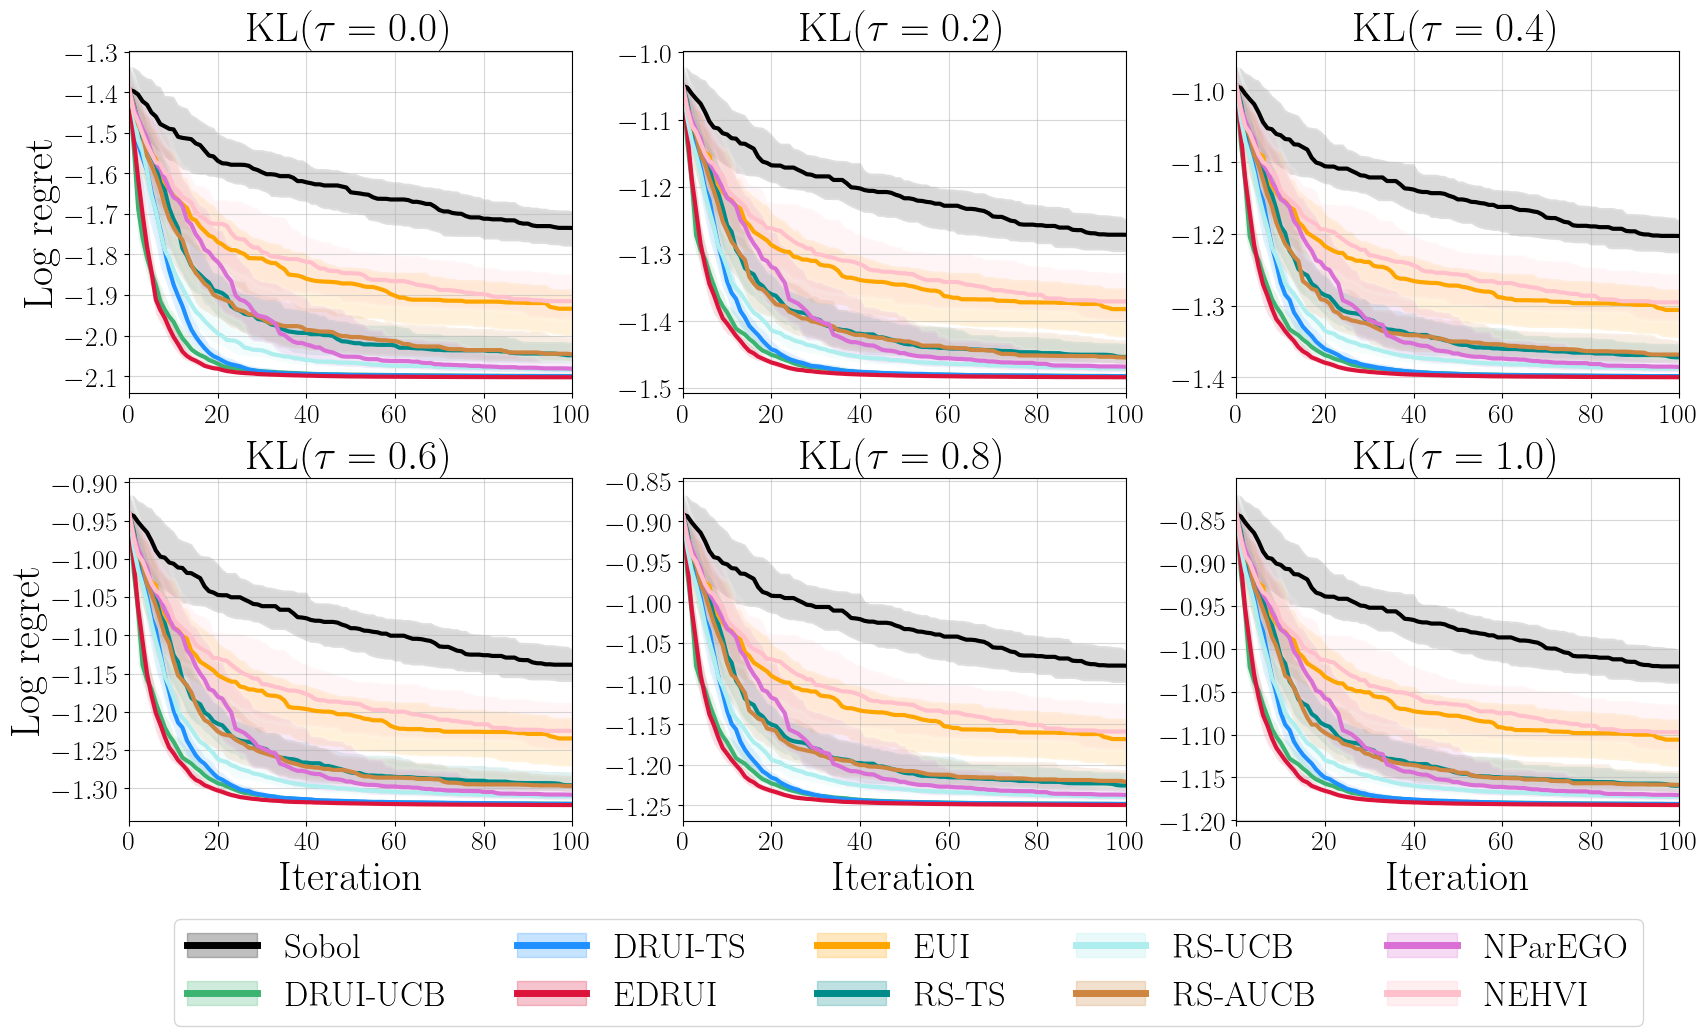

In [5]:
experiment = "truss_kl_hv"
experiment_data = torch.load(f"data/{experiment}_{mode}_data.pt")
titles = [rf"KL($\tau={e}$)" for e in epsilons]
fig = plot_all_experiments(epsilons, experiment_data, titles, 0.9)

# Rocket MCVaR

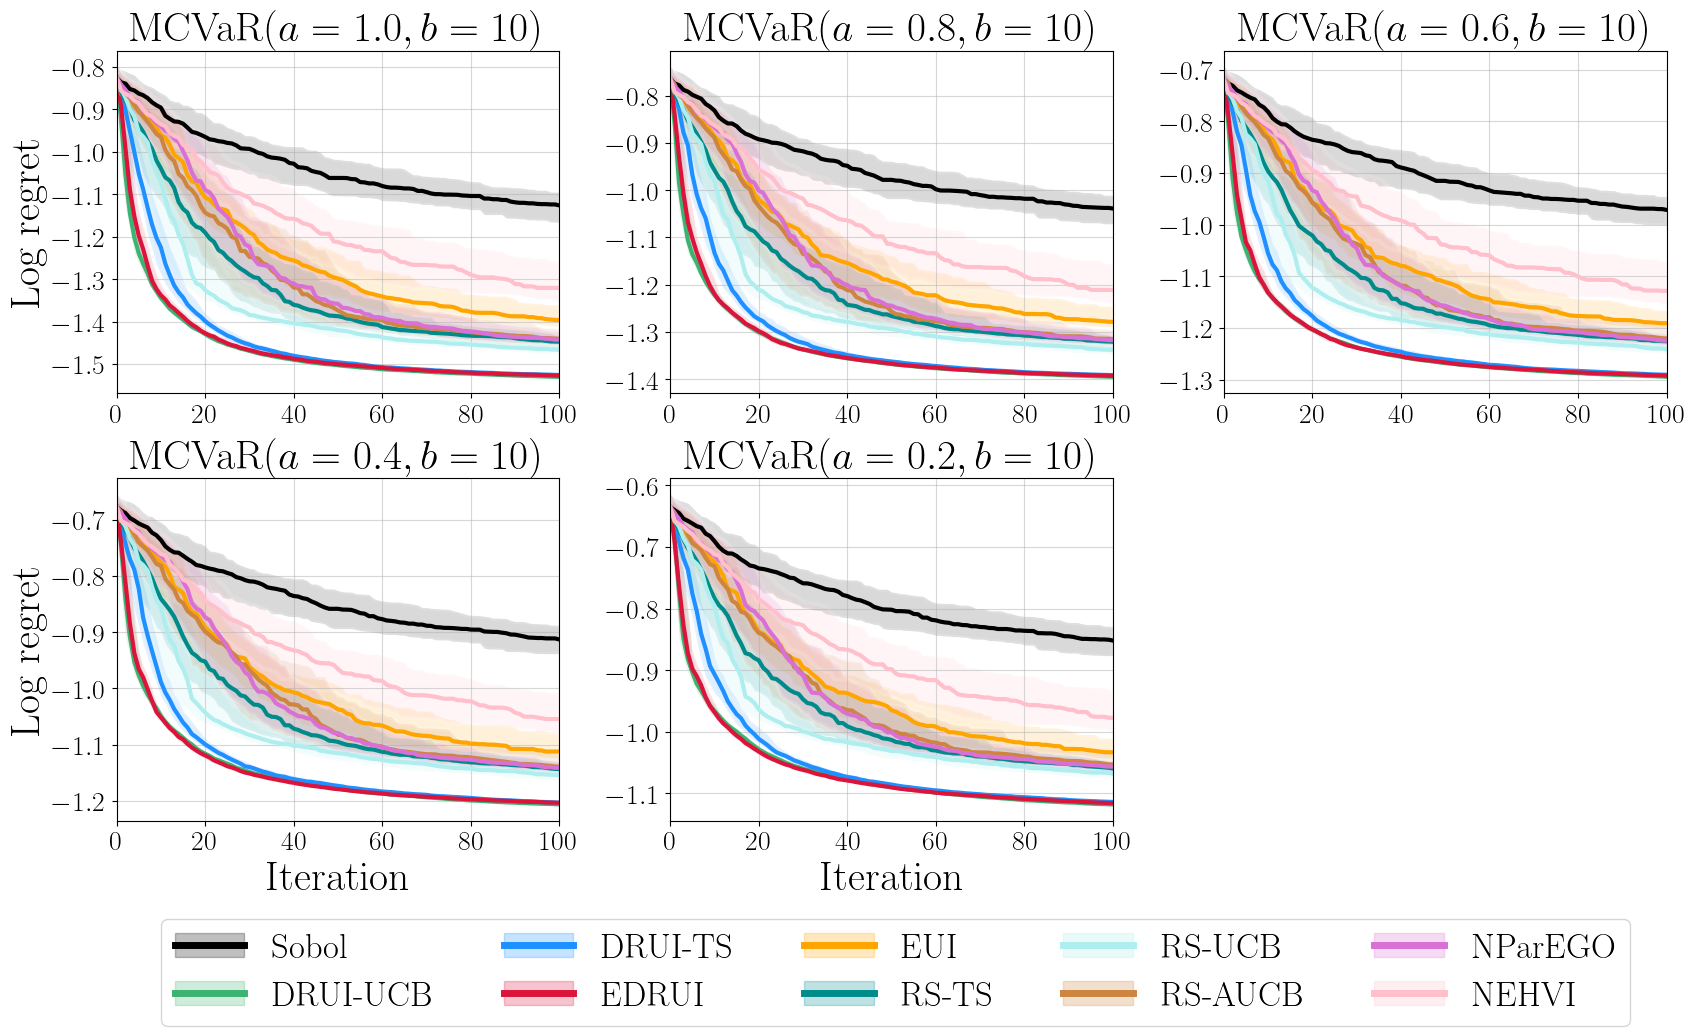

In [6]:
experiment = "rocket_mcvar_hv"
experiment_data = torch.load(f"data/{experiment}_{mode}_data.pt")
titles = [rf"MCVaR($a={a}, b=10$)" for a in alphas]
fig = plot_all_experiments(alphas, experiment_data, titles, 0.9)

# Vehicle

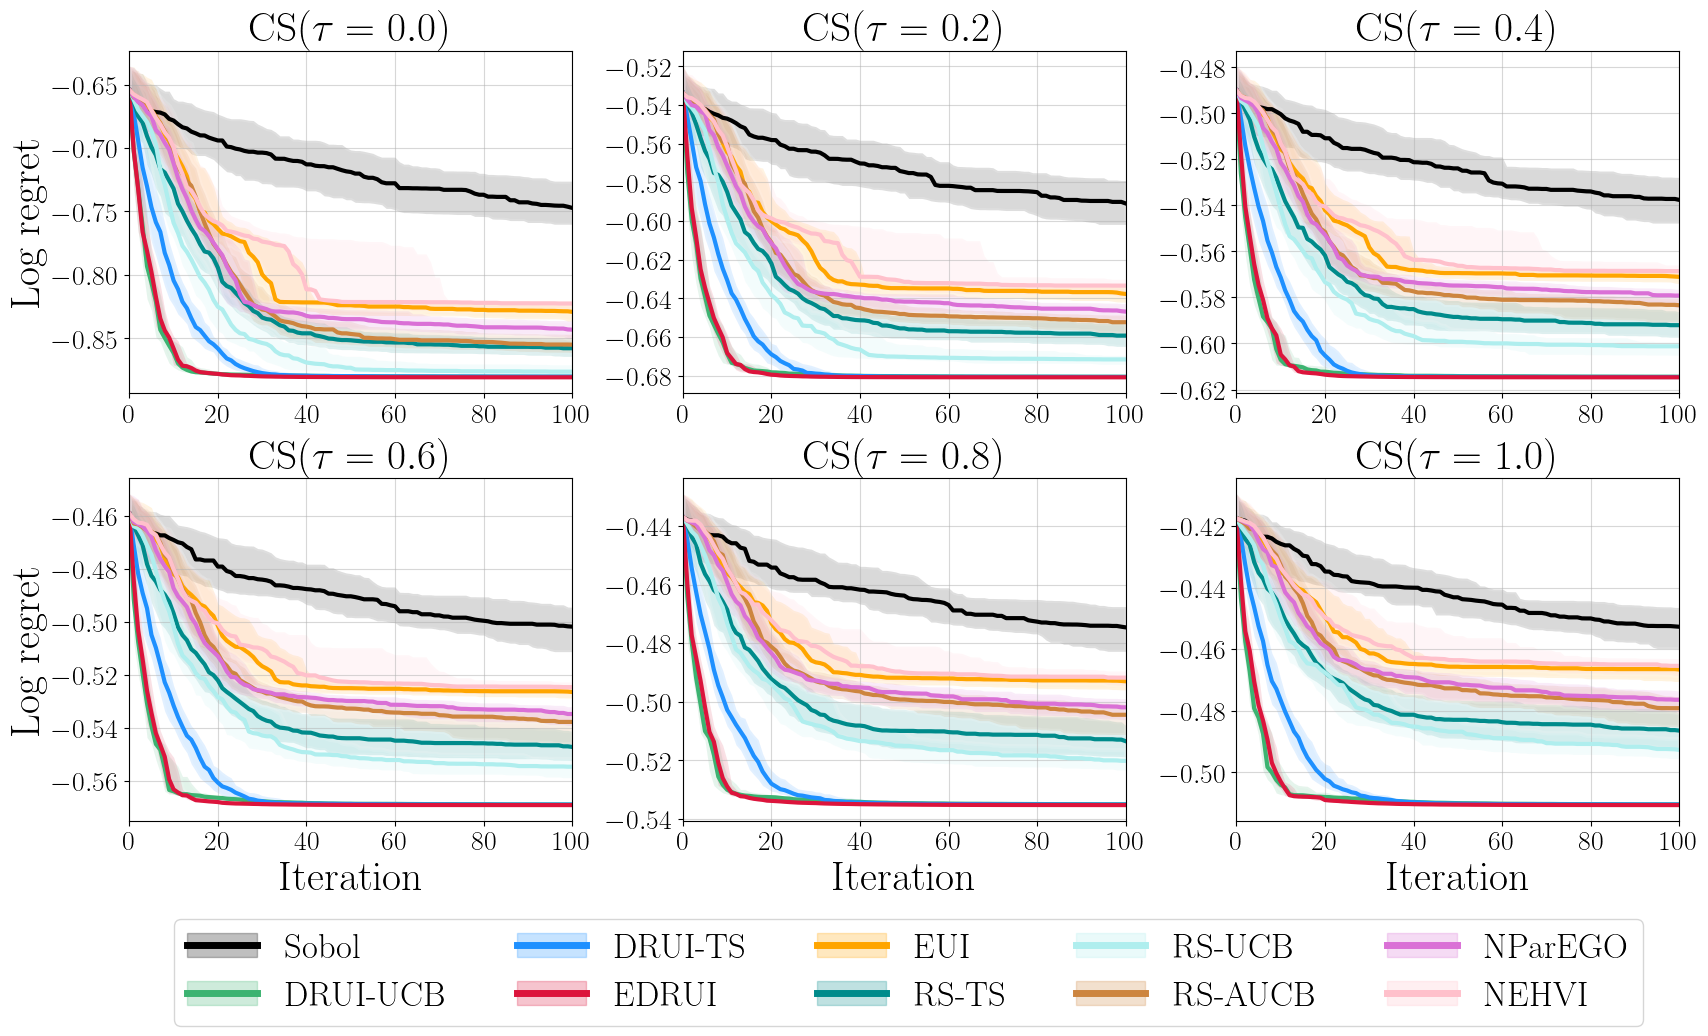

In [7]:
experiment = "vehicle_cs_hv"
experiment_data = torch.load(f"data/{experiment}_{mode}_data.pt")
titles = [rf"CS($\tau={e}$)" for e in epsilons]
fig = plot_all_experiments(epsilons, experiment_data, titles, 0.8)

# Penicillin

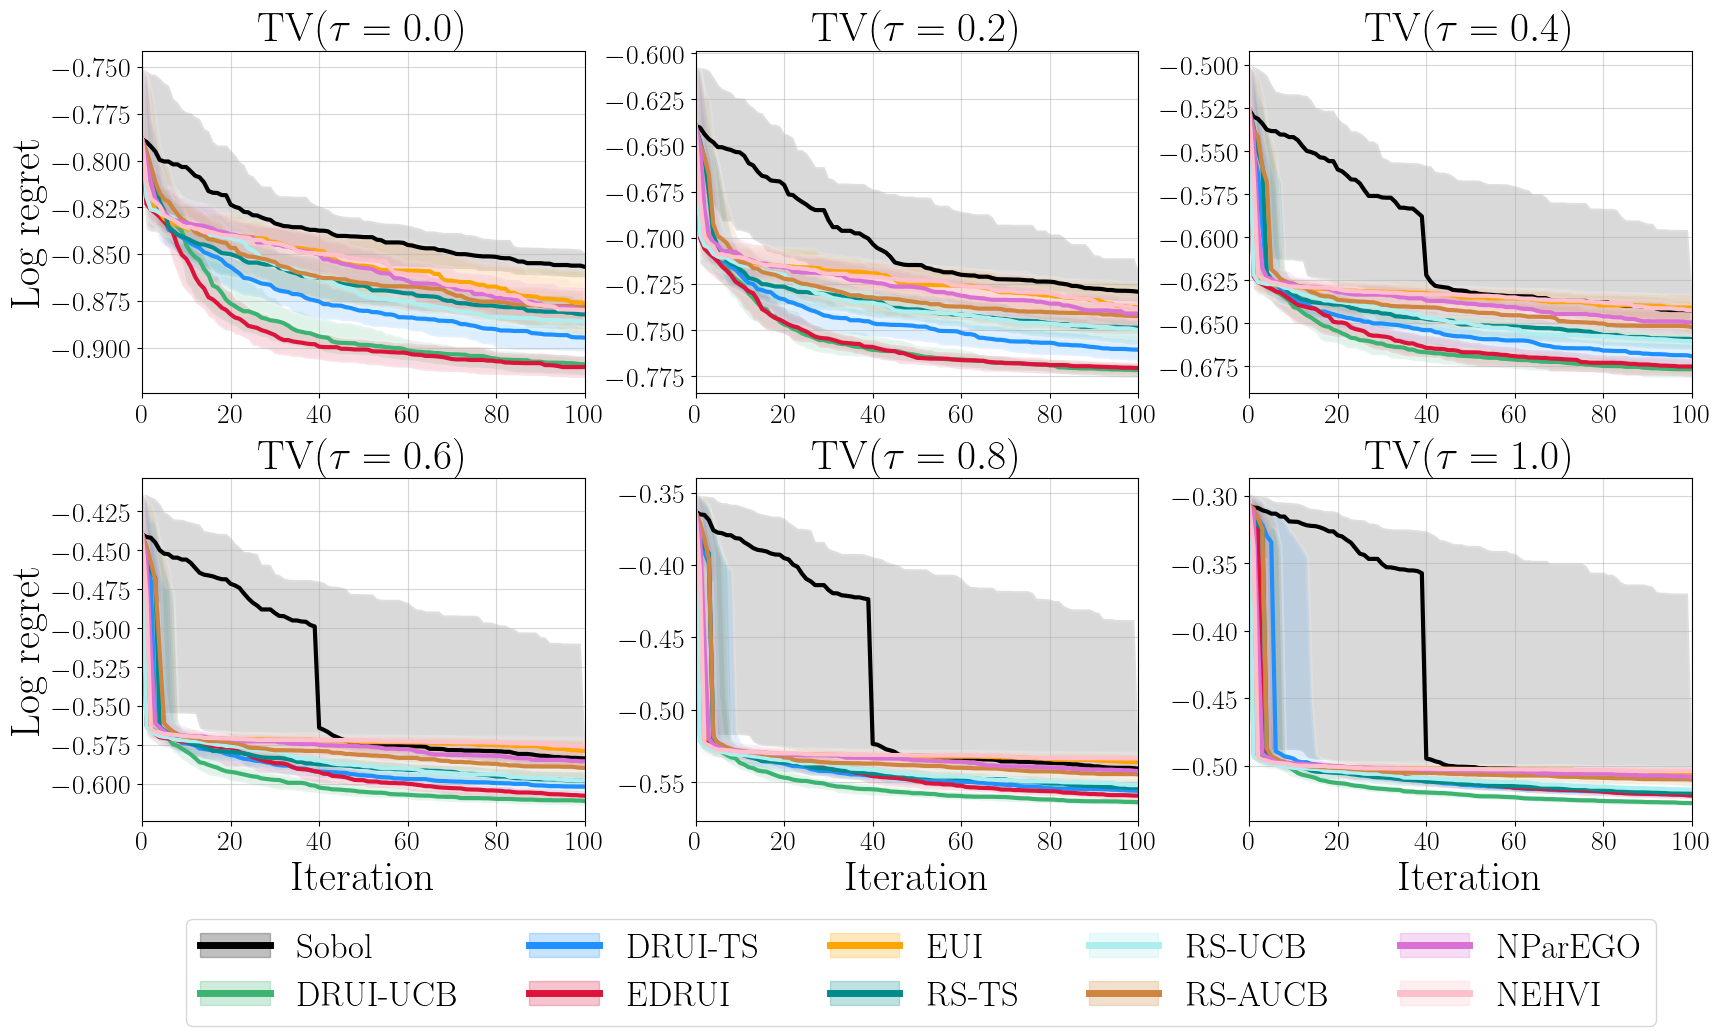

In [8]:
experiment = "penicillin_tv_hv"
experiment_data = torch.load(f"data/{experiment}_{mode}_data.pt")
titles = [rf"TV($\tau={e}$)" for e in epsilons]
fig = plot_all_experiments(epsilons, experiment_data, titles, 0.75)